In [1]:
#importing numpy, matplotlib, statistics & pandas.
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

In [3]:
# TASK 1
df = pd.read_csv('DS1_C4_S8_Students_Scores_Data_Concept-Copy1.csv')
df

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


In [4]:
#calculating the measure of central tendencies
mean = []
median = []
mode = []

for fetch in df.columns:
    mean.append(df[fetch].mean())
    median.append(df[fetch].median())
    mode.append(df[fetch].mode()[0])
    
print("Mean :  " , mean)
print("Median :",median)
print("Mode :  ",mode)



Mean :   [60.89, 81.84, 68.02]
Median : [60.0, 82.0, 69.0]
Mode :   [55, 86, 65]


In [5]:
#creating a dataframe
stat1 = pd.DataFrame([mean, median,mode], columns=['Statistics','Python','Tableau'], index = ['Mean', 'Median','Mode'])
stat1

,Statistics,Python,Tableau
Mean,60.89,81.84,68.02
Median,60.00,82.00,69.00
Mode,55.00,86.00,65.00


In [6]:

# TASK 2 Assuming df is your DataFrame
mean = []
variance = []
coefficient_of_variance = []

for fetch in df.columns:
    mean_value = df[fetch].mean()
    variance_value = df[fetch].var()
    std_dev = df[fetch].std()
    
    # Calculate coefficient of variation
    if mean_value != 0:  # Avoid division by zero
        cv = std_dev / mean_value
    else:
        cv = float('inf')  # Set to infinity if mean is zero
    
    mean.append(mean_value)
    variance.append(variance_value)
    coefficient_of_variance.append(cv)

print("Mean :  ", mean)
print("Variance :", variance)
print("Coefficient of Variation :  ", coefficient_of_variance)


Mean :   [60.89, 81.84, 68.02]
Variance : [52.361515151515164, 18.883232323232335, 53.595555555555556]
Coefficient of Variation :   [0.11883931187990199, 0.05309731341522791, 0.10762861729450192]


In [7]:
# TASK 3
from scipy.stats import skew
#the scipy.stats.skew function to determine the skewness of each dataset.

In [8]:
# Calculate skewness
skewness = df.apply(lambda x: skew(x, nan_policy='omit'))

print("Skewness of each subject:")
print(skewness)

Skewness of each subject:
Statistics    0.202446
Python        0.120964
Tableau      -0.995360
dtype: float64


In [9]:
#Interpretation: Statistics data is  skewed, Statistics is Mostly Skewed when compared with other subjects

In [10]:
for col in df.columns:
    lower_outliers = []
    upper_outliers = []
    
    ser = pd.Series(df[col])
    
    q1 = ser.quantile(0.25)    #quantile will gives the quartile
    q3 = ser.quantile(0.75)
    
    iqr = q3-q1
    LF = q1-1.5*iqr
    UF = q3+1.5*iqr
    
    for i in df[col]:
        if i < LF:
            lower_outliers.append(i)
        elif i >  UF:
            upper_outliers.append(i)
    
    if col=='Statistics':
        Statistics = ['Statistics',lower_outliers,upper_outliers]
    elif col == 'Python':
        Python = ['Python',lower_outliers,upper_outliers]
    elif col == 'Tableau':
          Tableau = ['Tableau',lower_outliers,upper_outliers]
        
    
print(Statistics)
print(Python)
print(Tableau)

['Statistics', [], []]
['Python', [], []]
['Tableau', [45, 50, 50, 50, 46, 46], []]


In [11]:
stat3 = pd.DataFrame([Statistics,Python,Tableau],
                    columns = ['Subject','lower_outliers','upper_outliers'])
stat3

,Subject,lower_outliers,upper_outliers
0,Statistics,[],[]
1,Python,[],[]
2,Tableau,"[45, 50, 50, 50, 46, 46]",[]


In [12]:
#Interpretation: on observing the  Skewness in the Statistics data, we came to know that Statistics data is mostky skewed with outliers.
#But, there are outliers in the Tableau data and tableau data is negatively skewed.

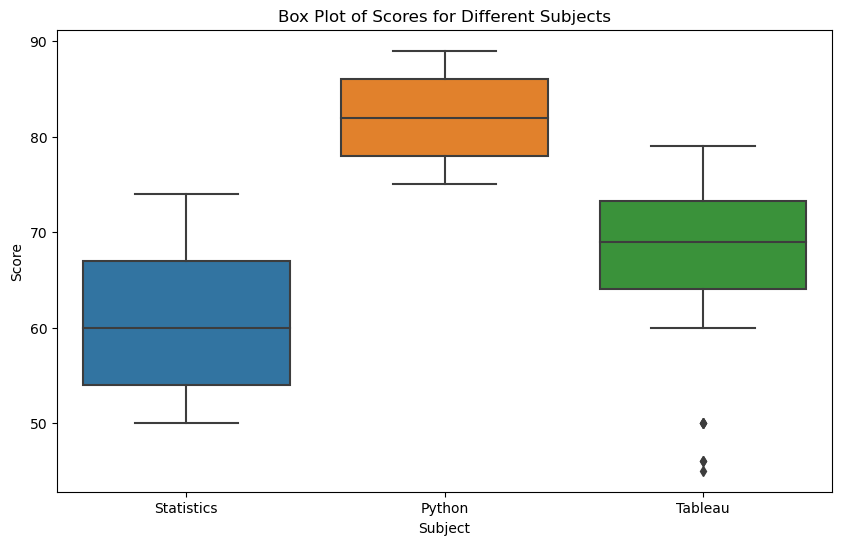

In [13]:
# TASK 4
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame for easier plotting with seaborn
df_melted = df.melt(var_name='Subject', value_name='Score')

# Create the box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Subject', y='Score', data=df_melted)
plt.title('Box Plot of Scores for Different Subjects')
plt.show()


In [14]:
from scipy.stats import skew

# Calculate skewness for each subject
skewness = df.apply(lambda x: skew(x, nan_policy='omit'))

print("Skewness of each subject:")
print(skewness)

# Identify the subject with the highest absolute skewness
most_skewed_subject = skewness.idxmax()
print(f"The subject with the most skewed scores is: {most_skewed_subject}")


Skewness of each subject:
Statistics    0.202446
Python        0.120964
Tableau      -0.995360
dtype: float64
The subject with the most skewed scores is: Statistics


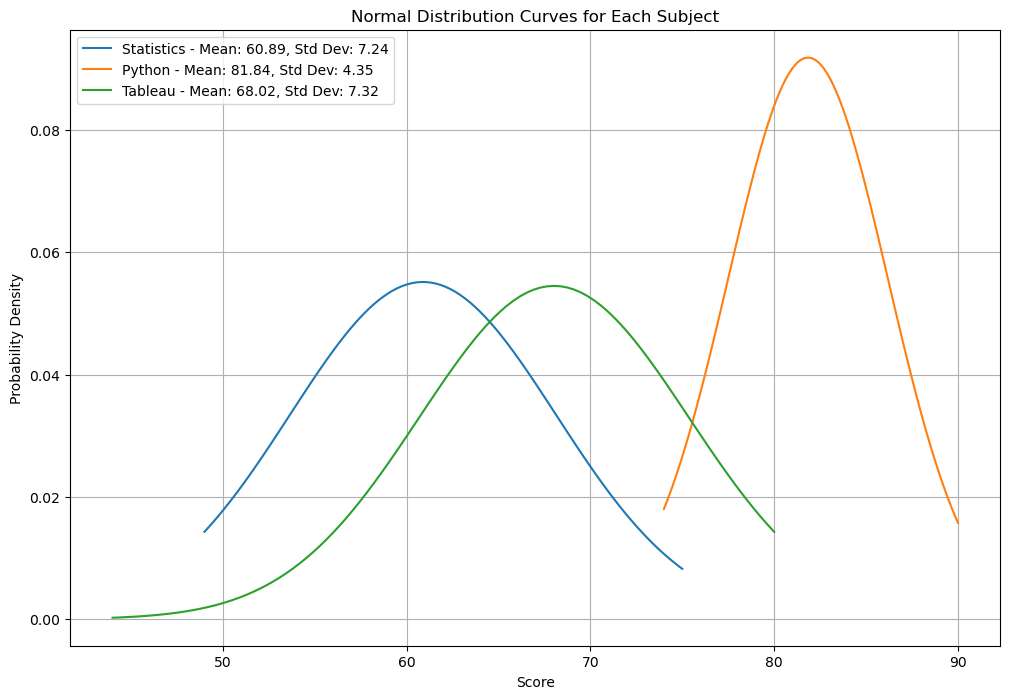

In [15]:
# TASK 5
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create a figure and axes
plt.figure(figsize=(12, 8))

# Plot normal distribution curves for each subject
for column in df.columns:
    # Generate points for the normal distribution curve
    x = np.linspace(df[column].min() - 1, df[column].max() + 1, 100)
    mean = df[column].mean()
    std_dev = df[column].std()
    pdf = norm.pdf(x, mean, std_dev)

    # Plot the density curve
    plt.plot(x, pdf, label=f'{column} - Mean: {mean:.2f}, Std Dev: {std_dev:.2f}')

plt.title('Normal Distribution Curves for Each Subject')
plt.xlabel('Score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
from scipy.stats import kurtosis

# Calculate kurtosis for each subject
kurtosis_values = df.apply(lambda x: kurtosis(x, fisher=True, nan_policy='omit'))

print("Kurtosis of each subject:")
print(kurtosis_values)


Kurtosis of each subject:
Statistics   -1.289034
Python       -1.274853
Tableau       1.442459
dtype: float64
